In [39]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 3

@author: yaning
"""

import importlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

# my own class files
import weight_normalise.Receptors as Receptors
import weight_normalise.Network as Network
import weight_normalise.create_update_synapse as cus


importlib.reload(Receptors)
importlib.reload(Network)
importlib.reload(cus)

path = "/home/yaning/Documents/Spiking_NN/weight_normalise/"
np.set_printoptions(threshold=np.inf)

In [40]:
pointCount = 6000
deltaTms = 0.05
times = np.arange(pointCount) * deltaTms
initial_Vm = 1.3458754117369027

In [41]:
# instead of using control i write those two functions :(have to copy it everytime i run)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))


In [42]:
neuron_input = Network.Neuron(deltaTms, 0, initial_Vm, "input")
neuron_output = Network.Neuron(deltaTms, 0, initial_Vm, "output")

In [43]:
cus.all_synapses

[]

In [44]:
cus.create_synapse(neuron_input, neuron_output, "AMPA")

In [45]:
neurons = [neuron_input, neuron_output]

In [46]:
for neuron in neurons:
    neuron.erase(initial_Vm)

In [47]:
voltages = []
ion_c = []
receptor_c = []
fire_states = []

for t in range(pointCount):
    if t >= 1500 and t < 2000:
        neuron_input.sending_signal()
        neuron_input.fire_tstep.append(t)
    Ireceptor, Ina = neuron_output.update()
    fire_states.append(neuron_output.fire_state)
    cus.all_synapses[0].state = 0
    voltages.append(neuron_output.Vm - 70)

    receptor_c.append(Ireceptor)
    ion_c.append(Ina)

In [54]:
fire_time = []
for i in voltages:
    if i >= -50:
        fire_time.append(i)

In [58]:
num = 0
for i in fire_time:
    if i == -48.18742350675606:
        print(num)
    num += 1

47


In [57]:
fire_time

[np.float64(-49.95393309305709),
 np.float64(-47.50963731027246),
 np.float64(-44.36613954932187),
 np.float64(-40.19178231753816),
 np.float64(-34.45371131517296),
 np.float64(-26.295539846679866),
 np.float64(-14.430675859734379),
 np.float64(2.471583890491601),
 np.float64(22.976782800359302),
 np.float64(37.07132165769285),
 np.float64(36.703916149400655),
 np.float64(36.48167951901499),
 np.float64(34.97985171558969),
 np.float64(33.840354827164475),
 np.float64(31.789250814450583),
 np.float64(30.154763095017955),
 np.float64(27.765200504250856),
 np.float64(25.759284999038826),
 np.float64(23.190400247500662),
 np.float64(20.896930684896518),
 np.float64(18.254679299841627),
 np.float64(15.76571115405406),
 np.float64(13.105162914234938),
 np.float64(10.513887247052224),
 np.float64(7.8622249491039184),
 np.float64(5.2431424862870415),
 np.float64(2.6192462071954594),
 np.float64(0.02039752150112406),
 np.float64(-2.559559782834384),
 np.float64(-5.087460678813613),
 np.float64(

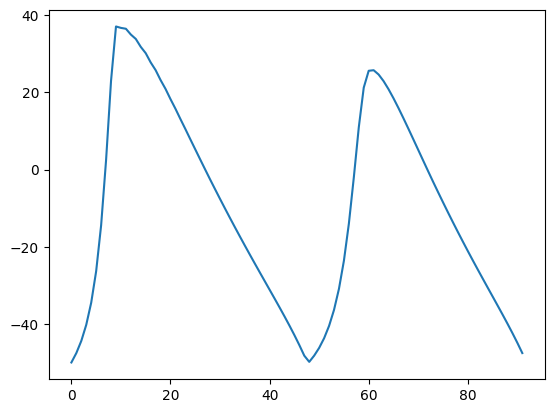

In [55]:
plt.plot(fire_time)

In [22]:
min(ion_c)

np.float64(-797.2944892346451)

In [23]:
min(receptor_c)

np.float64(-15.288406939872173)

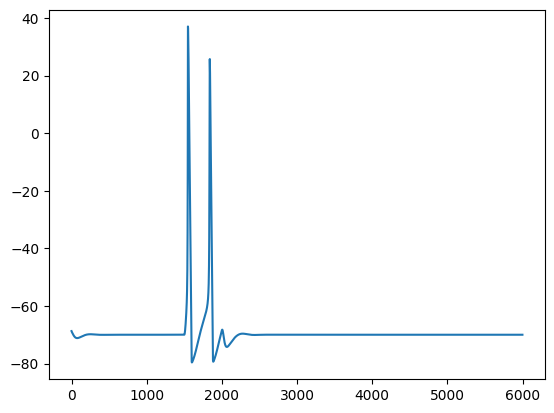

In [49]:
plt.plot(np.arange(6000), voltages)
# plt.plot(np.arange(6000), receptor_c)
# plt.plot(np.arange(6000), ion_c)
# plt.savefig('plots/threshold_small_nump.png', dpi=300)

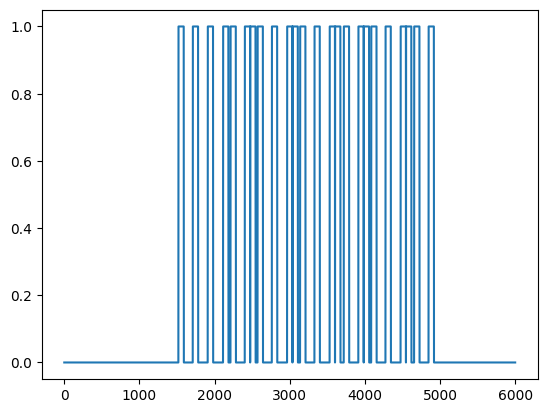

In [141]:
plt.plot(np.arange(6000), fire_states)

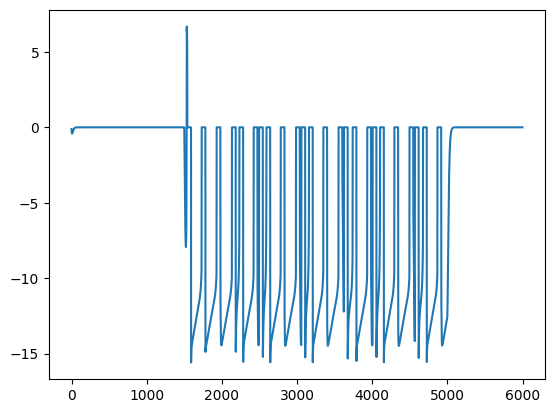

In [142]:
plt.plot(np.arange(6000), receptor_c)

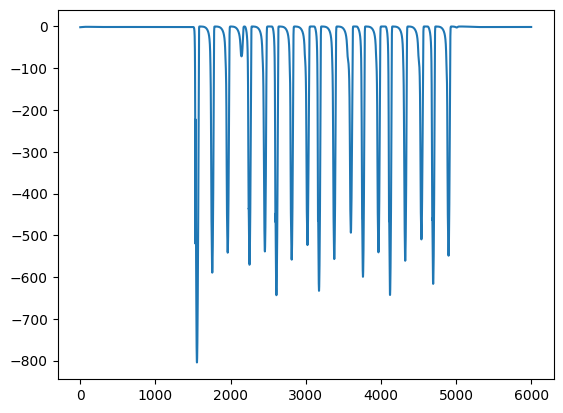

In [143]:
plt.plot(np.arange(6000), ion_c)